In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [3]:
from pylab import rcParams
rcParams["figure.figsize"]=20,5

In [4]:
df=pd.read_csv("../data/Electric_Production.csv")

In [5]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [6]:
#len(df)
df[1:50]

,DATE,IPG2211A2N
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154
10,11/1/1985,58.0005


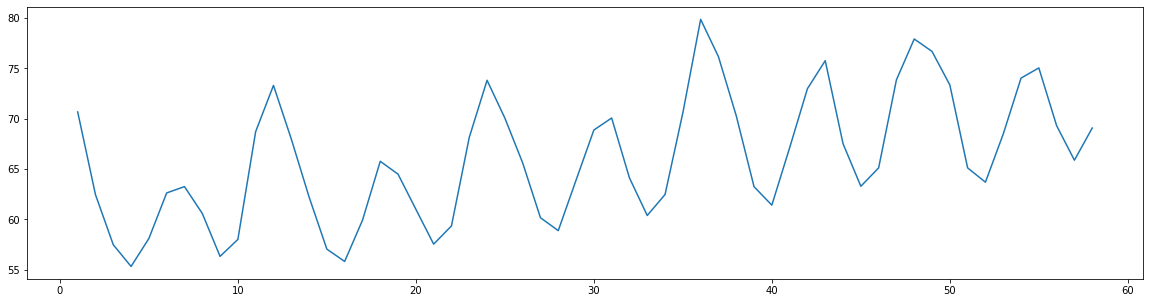

In [7]:
plt.plot(df[1:59]["IPG2211A2N"])

In [8]:
rollingseries=df[1:50].rolling(window=5)
roolingmean=rollingseries.mean()
roolingmean.head()

,IPG2211A2N
1,NaN
2,NaN
3,NaN
4,NaN
5,60.79982


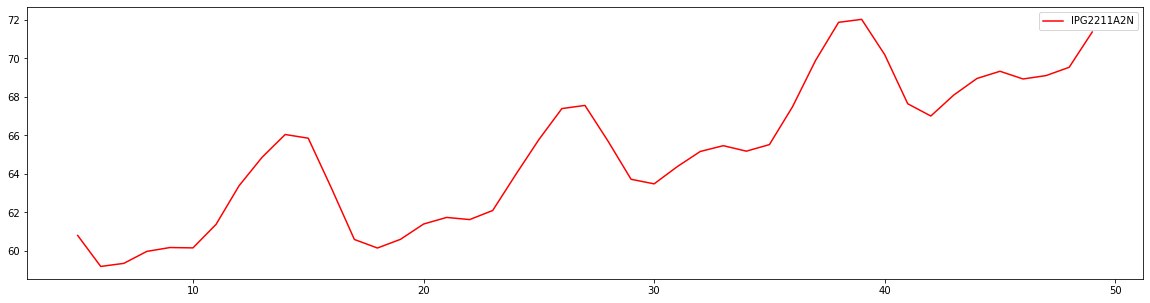

In [9]:
roolingmean.plot(color="red")
plt.show()

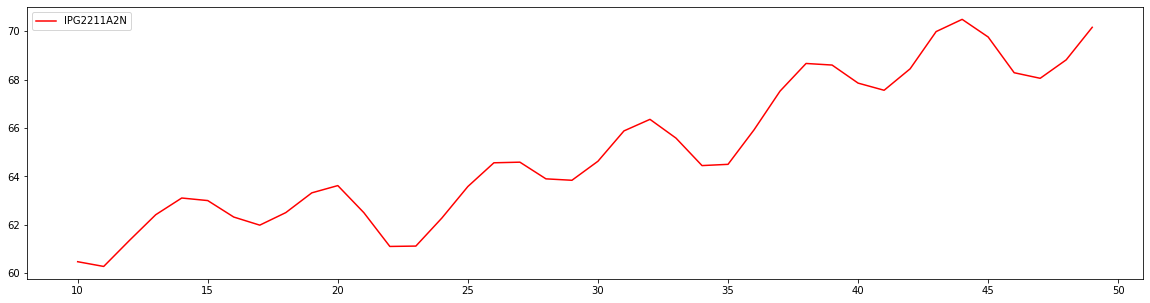

In [10]:
rollingseries=df[1:50].rolling(window=10)
roolingmean=rollingseries.mean()
roolingmean.plot(color="red")
plt.show()

#### SimpleExponential Smoothing\

In [11]:
data=df[1:50]

fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [12]:
df["DATE"].dtype

dtype('O')

In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
fit1=Holt(data).fit()
fit2=Holt(data,exponential=True).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### Decompose & Stationarity

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parser
import pandas as pd

### Additive time series:                                                                                                                                                          
              Value=Base Lavel + Trend + Seasonality + Error
### Multiplicative time Series:                                                                                                                                                 
              Value=Base Lavel * Trend * Seasonality * Error

In [17]:
df=pd.read_csv("..\/data/TimeSeries.csv")

In [18]:
df.head()

,Date,Value
0,01-07-1991,3.526591
1,01-08-1991,3.180891
2,01-09-1991,3.252221
3,01-10-1991,3.611003
4,01-11-1991,3.565869


In [19]:
DrugSalesData=pd.read_csv("..\/data/TimeSeries.csv",parse_dates=["Date"],index_col="Date")
DrugSalesData.head(10)

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869
1991-01-12,4.306371
1992-01-01,5.088335
1992-01-02,2.814520
1992-01-03,2.985811


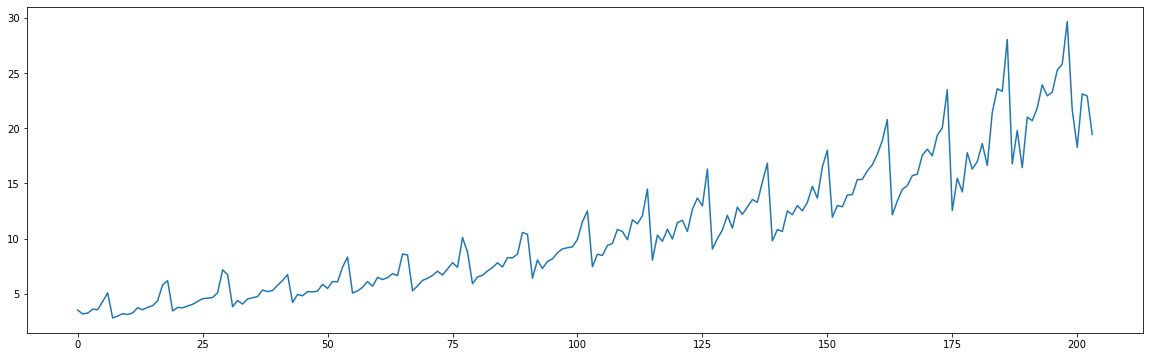

In [20]:
DrugSalesData.reset_index(inplace=True)
plt.rcParams.update({"figure.figsize":(20,6)})
plt.plot(DrugSalesData["Value"])

In [21]:
DrugSalesData.head(10)

,Date,Value
0,1991-01-07,3.526591
1,1991-01-08,3.180891
2,1991-01-09,3.252221
3,1991-01-10,3.611003
4,1991-01-11,3.565869
5,1991-01-12,4.306371
6,1992-01-01,5.088335
7,1992-01-02,2.814520
8,1992-01-03,2.985811
9,1992-01-04,3.204780


In [22]:
#multiplicative Decomposition
mul_result=seasonal_decompose(DrugSalesData["Value"],model="multiplicative",period=1)

#Additive Decomposition
add_result=seasonal_decompose(DrugSalesData["Value"],model="additive",period=1)


Text(0.5, 0.98, '\nMultiplicative Decompose')

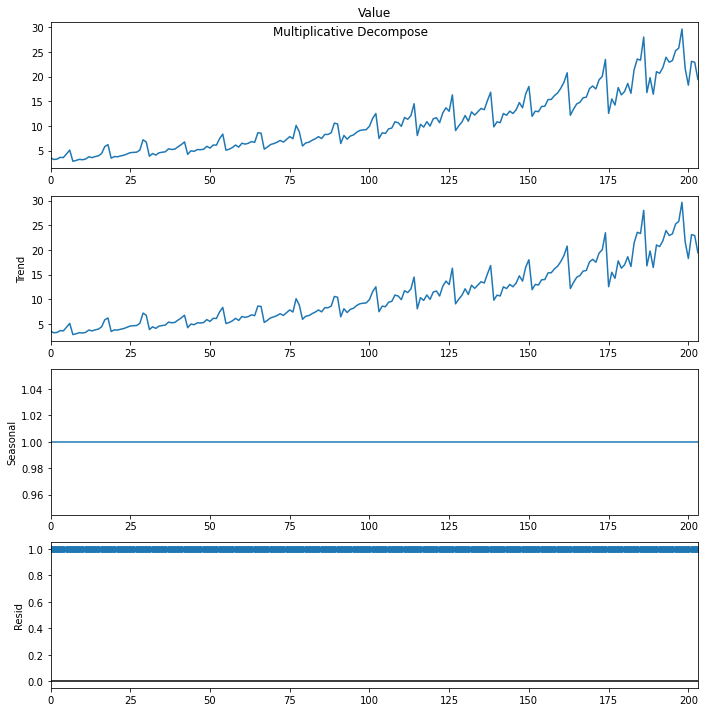

In [23]:
plt.rcParams.update({"figure.figsize":(10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose',fontsize=12)

In [24]:
#additive

new_df_add=pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed],axis=1)
new_df_add.columns=["seasoanilty","trend","residual","actual_values"]
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [25]:
new_df_mult=pd.concat([mul_result.seasonal,mul_result.trend,mul_result.resid,mul_result.observed],axis=1)
new_df_mult.columns=["seasoanilty","trend","residual","actual_values"]
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


### Stationarity

#### Adfuller test for Stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
#ADF Test - nul hypothesis - non-stationary - if p_value <5% reject null hypothesis

adfuller_result=adfuller(DrugSalesData.Value.values,autolag="AIC")

In [28]:
print(f"ADF Statistics: {adfuller_result[0]}")
print(f"p-value: {adfuller_result[1]}")

for key,value in adfuller_result[4].items():
    print("Critial Values: ")
    print(f"{key},{value}")

ADF Statistics: 3.14518568930673
p-value: 1.0
Critial Values: 
1%,-3.465620397124192
Critial Values: 
5%,-2.8770397560752436
Critial Values: 
10%,-2.5750324547306476


In [29]:
adfuller_result[4]

{'1%': -3.465620397124192,
 '5%': -2.8770397560752436,
 '10%': -2.5750324547306476}

In [30]:
adfuller_result

(3.14518568930673,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364174)

In [31]:
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)
from statsmodels.tsa.stattools import acf,pacf

In [32]:
#import matplotlib
#matplotlib.rc('xtick',labelsize=30)
#matplotlib.rc('ytick',labelsize=30)


In [33]:
axisline=np.linspace(0,10,500)

#normal distribution value
normalnumbers=np.random.normal(0,5,500)

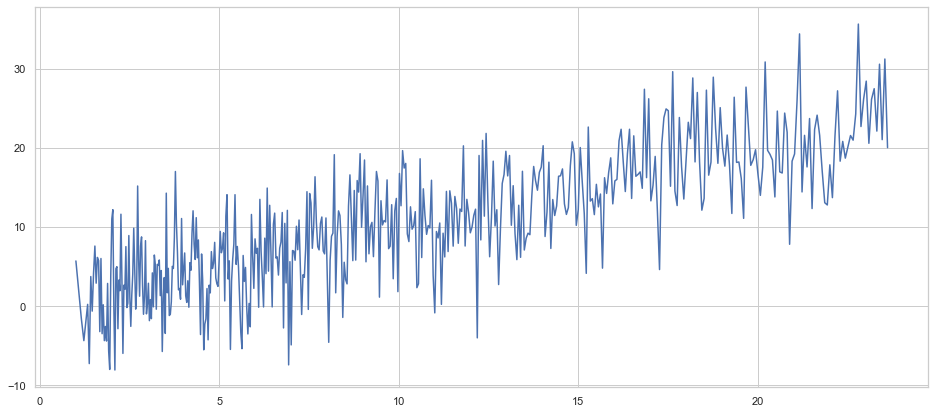

In [35]:
#exponential series to get the trend
Exponential=np.exp(axisline**0.5)

#adding normally distributed series in exponential  series
y=normalnumbers+Exponential

plt.figure(figsize=(16,7))
plt.plot(Exponential,y)